In [1]:
# importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# treading the csv file
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#checking the correation of the outcome colum with other
df.corr()["Outcome"]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [4]:
#data split
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [5]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()

#scaling the data
X = scaller.fit_transform(X)

In [6]:
X.shape

(768, 8)

In [7]:
# spliting the dataset into train test split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)
    

In [8]:
print(f"the length of train data is {len(Xtrain)}")
print(f"The length of the test data is {len(Xtest)}")

the length of train data is 614
The length of the test data is 154


In [9]:
#building the model
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [10]:
model  = Sequential()

model.add(Dense(32, activation='relu', input_dim = 8))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-12-12 21:51:55.935249: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-12-12 21:51:55.935275: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-12 21:51:55.935280: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-12 21:51:55.935291: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-12 21:51:55.935301: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Cr

In [11]:
output = model.fit(Xtrain, Ytrain, batch_size=32, epochs=100, validation_data=(Xtest, Ytest))

Epoch 1/100


2024-12-12 21:51:56.242460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6721 - loss: 0.6373 - val_accuracy: 0.7208 - val_loss: 0.6142
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7328 - loss: 0.6035 - val_accuracy: 0.7532 - val_loss: 0.5817
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7498 - loss: 0.5735 - val_accuracy: 0.7597 - val_loss: 0.5572
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7621 - loss: 0.5355 - val_accuracy: 0.7597 - val_loss: 0.5377
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7743 - loss: 0.5139 - val_accuracy: 0.7597 - val_loss: 0.5247
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7627 - loss: 0.5093 - val_accuracy: 0.7597 - val_loss: 0.5142
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7671 - loss: 0.4954 - val_accuracy: 0.7532 - val_loss: 0.5086
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7562 - loss: 0.4933 - val_accuracy: 0.7597 - val_loss: 0.

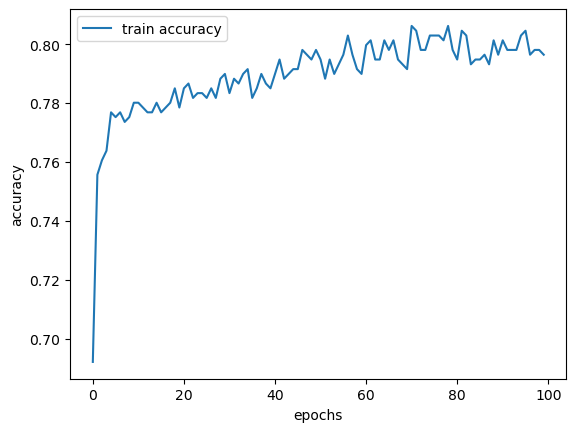

In [12]:
plt.plot(output.history["accuracy"])
plt.legend(["train accuracy"])

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

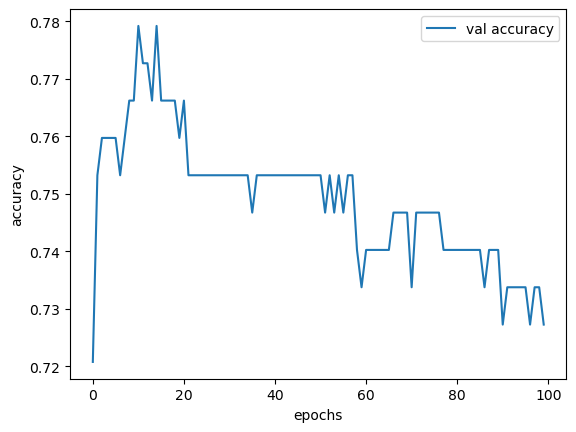

In [13]:
plt.plot(output.history["val_accuracy"])
plt.legend(["val accuracy"])

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [14]:
import kerastuner as kt

/var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/ipykernel_24863/1654478174.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


### selecting the right optimizer

In [15]:
def build_model(hp):
    model = Sequential()

    model.add(Dense(32, activation='relu', input_dim = 8))
    model.add(Dense(1, activation='sigmoid'))

    optimizer_options = hp.Choice("optimizer", values = ["adam", "sgd", "rmsprop", "adadelta"])
    
    model.compile(optimizer= optimizer_options, loss = 'binary_crossentropy', metrics=["accuracy"])

    return model

In [16]:
#creating a tunner object
tunner = kt.RandomSearch(build_model,
    objective = "val_accuracy", 
    max_trials = 5
)

Reloading Tuner from ./untitled_project/tuner0.json


In [17]:
tunner.search(Xtrain, Ytrain, epochs=5, validation_data = (Xtest, Ytest))

In [30]:
tunner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [31]:
model = tunner.get_best_models(num_models=1)[0]

/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
output = model.fit(Xtrain, Ytrain, epochs=100, initial_epoch=6, validation_data=(Xtest, Ytest))

### Selecting the number of nodes

### How to select the number of layers

### creating the model